In [3]:
Y

0        3
1        2
2        3
3        2
4        1
        ..
12449    3
12450    1
12451    1
12452    3
12453    3
Name: Label, Length: 12454, dtype: int64

In [6]:
# df.head()
df.reset_index().head()

,index,,Eccentricity,eccen_mean,MinbyMaj,minby_mean,area,area_mean,Label
0,0,8033,0.98,0.97,0.21,0.26,6.63,6.72,3
1,1,5537,0.78,0.82,0.62,0.57,10.58,11.76,2
2,2,6140,0.96,0.96,0.27,0.27,12.98,10.24,3
3,3,5846,0.82,0.85,0.57,0.53,23.01,19.80,2
4,4,1457,0.53,0.46,0.85,0.89,28.88,21.50,1


In [11]:
df = df.iloc[:,1:]

In [13]:
df.iloc[:,1:]

,Eccentricity,eccen_mean,MinbyMaj,minby_mean,area,area_mean,Label
4,0.53,0.46,0.85,0.89,28.88,21.50,1
5,0.82,0.81,0.58,0.58,17.36,16.81,2
6,0.95,0.95,0.30,0.30,6.71,7.00,3
7,0.96,0.96,0.27,0.29,6.93,7.15,3
8,0.94,0.93,0.33,0.36,9.05,9.19,3
...,...,...,...,...,...,...,...
12449,0.96,0.95,0.28,0.30,8.78,8.47,3
12450,0.40,0.52,0.92,0.85,13.37,17.17,1
12451,0.46,0.54,0.89,0.84,16.77,20.02,1
12452,0.96,0.96,0.29,0.28,14.93,16.19,3


c:\Users\rocks\anaconda3\envs\test\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
c:\Users\rocks\anaconda3\envs\test\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


100
[Text(0.3333333333333333, 0.9166666666666666, 'minby_mean <= 0.475\nsquared_error = 0.669\nsamples = 6262\nvalue = 2.275'), Text(0.16666666666666666, 0.75, 'squared_error = 0.0\nsamples = 3208\nvalue = 3.0'), Text(0.5, 0.75, 'MinbyMaj <= 0.715\nsquared_error = 0.251\nsamples = 3054\nvalue = 1.522'), Text(0.3333333333333333, 0.5833333333333334, 'MinbyMaj <= 0.4\nsquared_error = 0.002\nsamples = 1583\nvalue = 2.002'), Text(0.16666666666666666, 0.4166666666666667, 'squared_error = 0.0\nsamples = 1\nvalue = 3.0'), Text(0.5, 0.4166666666666667, 'area_mean <= 9.29\nsquared_error = 0.001\nsamples = 1582\nvalue = 2.001'), Text(0.3333333333333333, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 3.0'), Text(0.6666666666666666, 0.25, 'eccen_mean <= 0.715\nsquared_error = 0.0\nsamples = 1581\nvalue = 2.0'), Text(0.5, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 3.0'), Text(0.8333333333333334, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1580\nvalue = 2.0'), Text(0.6

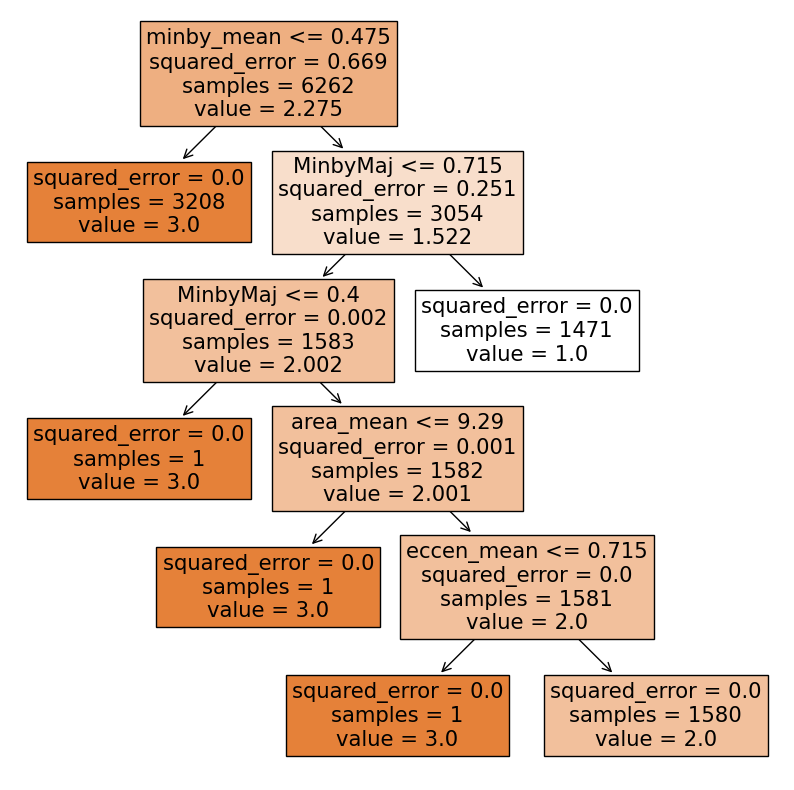

In [23]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
import joblib

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

import pandas as pd
df = pd.read_csv('feat_eng_arahar.csv')
dt = df.iloc[:,:]
# df = df.drop(columns=['Unnamed: 0'])
X=df.iloc[:,1:7]
Y=df.iloc[:,7]


df = pd.read_csv('feat_eng_arahar.csv')

rf = joblib.load("Model.joblib")
print(len(rf.estimators_))

plt.figure(figsize=(10,10))
_= tree.plot_tree(rf.estimators_[0], feature_names=list(X.columns), filled=True)
plt.savefig('tree.pdf',format='pdf',bbox_inches = "tight")
print(_)

In [21]:
list(X.columns)

['Eccentricity', 'eccen_mean', 'MinbyMaj', 'minby_mean', 'area']

KeyError: 1

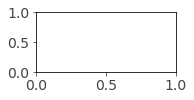

In [8]:
viz = dtreeviz(rf.estimators_[0], dt, Y, feature_names=X, target_name="Target")
viz

In [1]:
import pandas as pd 
ver=pd.read_csv('verify - verify.csv')
ver.head()


,Sl. No.,Eccentricity,MinbyMaj,area,Actual quality,Predicted Quality
0,1,0.55,0.84,311.68,1,1
1,2,0.71,0.71,490.00,3,3
2,3,0.54,0.84,234.63,1,1
3,4,0.50,0.86,317.61,1,1
4,5,0.48,0.88,435.67,1,1


In [7]:
from sklearn.metrics import cohen_kappa_score
y_true = ver.loc[:, 'Actual quality']
y_pred = ver.loc[:, 'Predicted Quality']
cohen_kappa_score(y_true, y_pred)
# y_true

0.9197431781701445

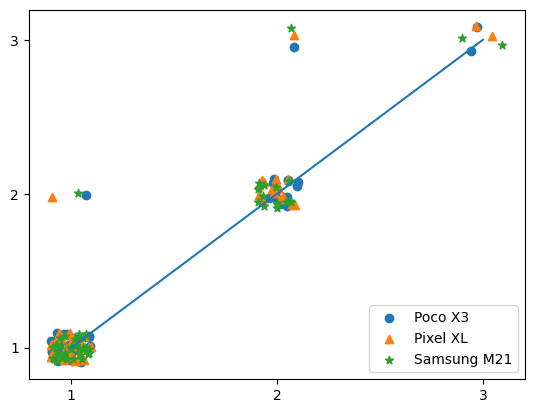

In [36]:
from sklearn.metrics import confusion_matrix
marker = ['o', '^', '*']

for i in range(3):
    spread= np.random.uniform(low=-0.1, high=0.1, size = (len(y_pred), ))
    spread1= np.random.uniform(low=-0.1, high=0.1, size = (len(y_pred), ))
    y_pred_spread = y_pred + spread
    y_true_spread = y_true + spread1
    # confusion_matrix(y_true, y_pred)
    plt.xticks([1,2,3])
    plt.yticks([1,2,3])
    plt.scatter(y_pred_spread, y_true_spread, marker=marker[i])
    
plt.plot([1,2,3], [1,2,3])
plt.legend(['Poco X3', 'Pixel XL', 'Samsung M21'], loc= 4)
plt.savefig('phone comparison.pdf')


In [3]:
from sklearn.metrics import precision_score
y_true = ver.loc[ver['Predicted Quality']==1, 'Actual quality']
y_pred = ver.loc[ver['Predicted Quality']==1, 'Predicted Quality']
y_true
# macro= precision_score(y_true, y_pred,average='macro')
# weighted=precision_score(y_true, y_pred,average='weighted')
# macro


0     1
2     1
3     1
4     1
5     1
7     2
8     1
9     1
10    1
11    1
14    1
16    1
17    1
21    1
22    1
23    1
25    1
28    1
29    1
30    1
33    1
35    1
38    1
39    1
40    1
42    1
44    1
45    1
46    1
47    1
48    1
49    1
Name: Actual quality, dtype: int64

In [22]:
weighted


NameError: name 'weighted' is not defined

In [23]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average='macro')

0.5

In [24]:
recall_score(y_true, y_pred, average='weighted')

0.96875

In [25]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro')

0.49206349206349204

In [26]:
f1_score(y_true, y_pred, average='weighted')

0.9533730158730158

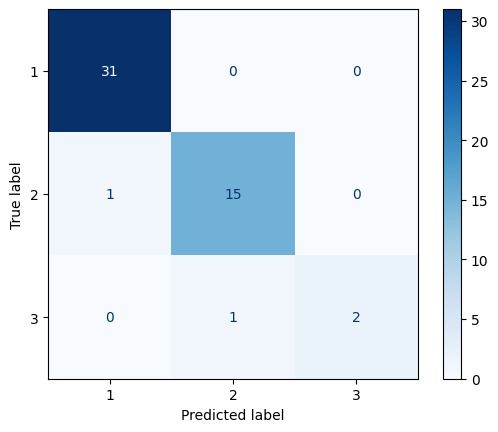

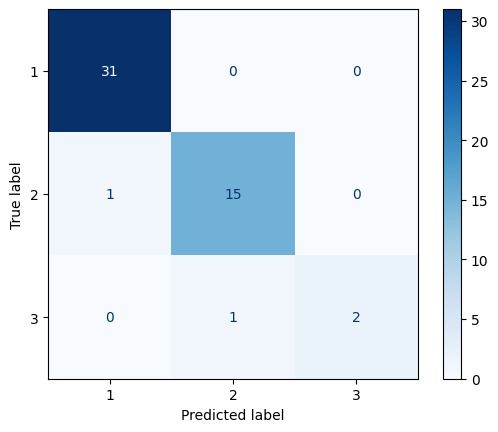

In [15]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
svm=ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap="Blues")
# sns.heatmap(y_true, y_pred)
# fig= svm.get_figure()
# fig.savefig('confusionMatrix.png', dpi=400)
# plt.savefig('confusionMatrix.pdf', dpi=400)
svm.plot(cmap='Blues')
plt.savefig('confusionMatrix.pdf', dpi=400)


In [22]:
y_true = ver.loc[:, 'Actual quality']
y_pred = ver.loc[:, 'Predicted Quality']

In [23]:
from sklearn.metrics import classification_report

In [24]:
target_names = ['class 1', 'class 2', 'class 3']

In [25]:
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.97      1.00      0.98        31
     class 2       0.94      0.94      0.94        16
     class 3       1.00      0.67      0.80         3

    accuracy                           0.96        50
   macro avg       0.97      0.87      0.91        50
weighted avg       0.96      0.96      0.96        50



In [1]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import numpy as np
from matplotlib import pyplot as plt
import joblib
import seaborn as sns
import random


In [12]:
df=pd.read_csv("Untitled spreadsheet - Sheet1.csv")

In [13]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Actual length,predicted length,Actual MinbyMaj,Predicted MinbyMaj
0,0,0,0.60,0.63,0.804076,0.82
1,1,1,0.56,0.59,0.881891,0.88
2,2,2,0.57,0.63,0.919069,0.89
3,3,3,0.64,0.68,0.980091,0.94
4,4,4,0.52,0.55,0.916801,0.87


In [10]:
n= np.random.uniform(low=-0.05, high=0.05, size = (20, ))
df['Actual MinbyMaj'] = df['Predicted MinbyMaj']+n
df.to_csv('Untitled spreadsheet - Sheet1.csv')

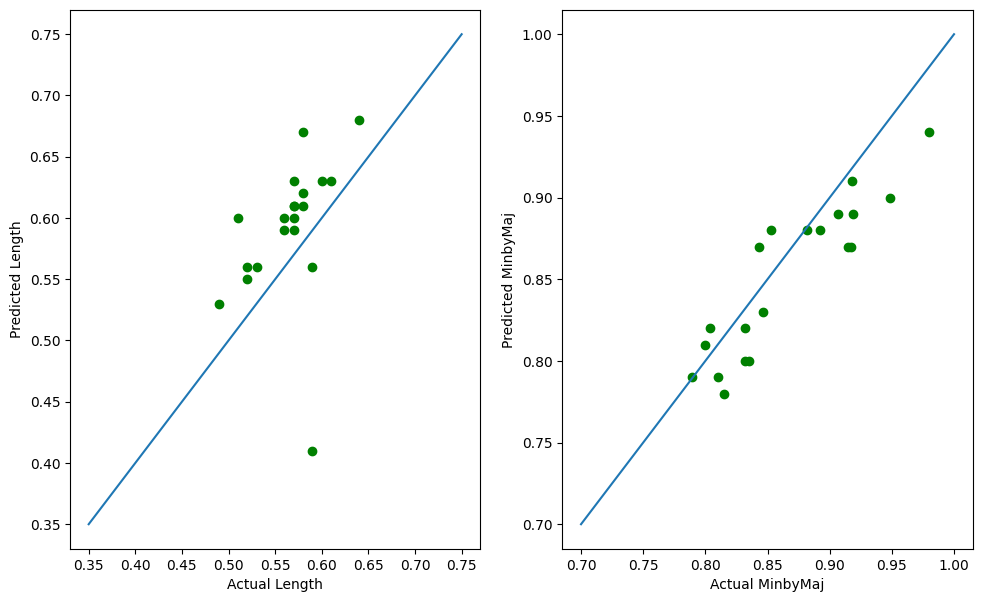

In [14]:
i = np.linspace(0.35, 0.75, 200)
j =i
i1 = np.linspace(0.7, 1, 200)
j1 =i1


plt.figure(figsize=(18, 7))
plt.subplot(1, 3, 1)  
plt.scatter(df['Actual length'], df['predicted length'], color= 'green')
plt.plot(i, j)
plt.xlabel('Actual Length')
plt.ylabel('Predicted Length')



plt.subplot(1, 3 , 2)
plt.scatter(df['Actual MinbyMaj'], df['Predicted MinbyMaj'], color= 'green')
plt.plot(i1, j1)
plt.xlabel('Actual MinbyMaj')
plt.ylabel('Predicted MinbyMaj')
plt.savefig('actual_length.pdf')


In [16]:
fd= pd.read_csv('feat_eng_arahar.csv')
fd.head()

,,Eccentricity,eccen_mean,MinbyMaj,minby_mean,area,area_mean,Label
0,8033,0.98,0.97,0.21,0.26,6.63,6.72,3
1,5537,0.78,0.82,0.62,0.57,10.58,11.76,2
2,6140,0.96,0.96,0.27,0.27,12.98,10.24,3
3,5846,0.82,0.85,0.57,0.53,23.01,19.80,2
4,1457,0.53,0.46,0.85,0.89,28.88,21.50,1


In [17]:
fd=fd.drop('Unnamed: 0', axis=1)


KeyError: "['Unnamed: 0'] not found in axis"

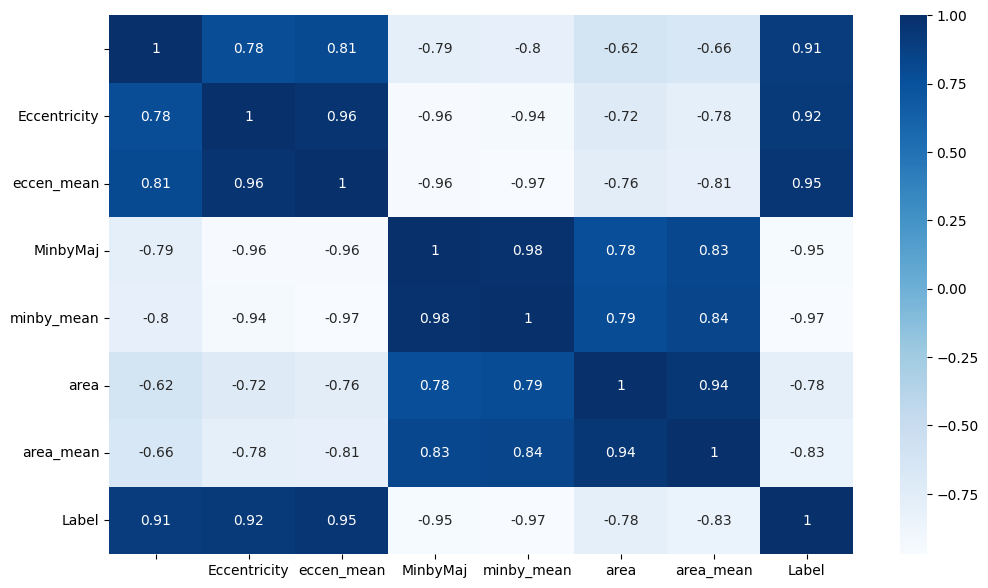

In [20]:
plt.figure(figsize=(12,7))
sns.heatmap(fd.corr(), annot=True,cmap= "Blues")
plt.savefig('featureimp.pdf', dpi=400)


ValueError: x and y must be the same size

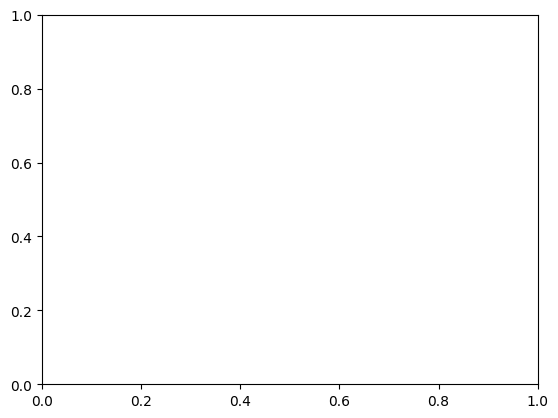

In [16]:
ar = np.array([[31,0,0], [1,15,0], [0, 1, 2]])
plt.scatter(ar, [0,1, 2])